importing modules

In [34]:
import matplotlib.pylab as plt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_curve,roc_auc_score
from imblearn.over_sampling import SMOTE

loading the data and extracting the labels y and the features x(excluding time ) and we also compare the average Amount of fraud vs non fraund transaction 

In [45]:
data=read_csv("../data/creditcard.csv")
x=data.drop(["Time","Class"],axis=1)
y=data["Class"]
print(y[y>0].shape)
print(y[y==0].shape)
fraudAverage=np.mean(x[y>0]["Amount"])
nonFraudAverage=np.mean(x[y==0]["Amount"])
print("Fraud average amount :"+str(fraudAverage))
print("Non fraud average amount :"+str(nonFraudAverage))

(56,)
(13067,)
Fraud average amount :90.81589285714287
Non fraud average amount :62.52666870743093


From above we can notice two things:

1. The average amount of a fraud transaction is 30% bigger than non fraud one.

2. The dataset is highly imbalance, prompting the application of SMOTE (Synthetic Minority Oversampling Technique). This method effectively addresses the issue by generating new samples for the minority class through a k-neighbors approach.

In [41]:
oversampler=SMOTE(random_state=42)
x,y=oversampler.fit_resample(x,y)
print(y[y>0].shape)
print(y[y==0].shape)

(13067,)
(13067,)


Using simple cross validation

In [19]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=42,test_size=0.2)

Creating a logistic regression model with 0.2 tolerance and fit it to the training data.

In [20]:
model=LogisticRegression(tol=0.2,max_iter=1000)
model.fit(xTrain,yTrain)

LogisticRegression(max_iter=1000, tol=0.2)

Making predictions on the test data 

In [21]:
pred=model.predict(xTest)
print(pred)

[1 0 0 ... 1 0 0]


checking the model performance using mutliple matrics

In [26]:
confusionMatrix=confusion_matrix(pred,yTest)
recallScore=recall_score(pred,yTest)
precisionScore=precision_score(pred,yTest)
print("Confusion matrix is equal to :\n"+str(confusionMatrix))
print("Recall score is equal to :\n"+str(recallScore))
print("Precision score is equal to :\n"+str(precisionScore))

Confusion matrix is equal to :
[[2624   83]
 [  30 2490]]
Recall score is equal to :
0.9880952380952381
Precision score is equal to :
0.967741935483871


The confusion matrix shows 2624 true positives, 83 false positives, 30 false negatives, and 2490 true negatives. The recall score is approximately 0.9881, indicating high sensitivity to positive instances. The precision score is about 0.9677, suggesting a high proportion of correctly identified positive predictions.

Area under the curve is : 0.9782191214721541


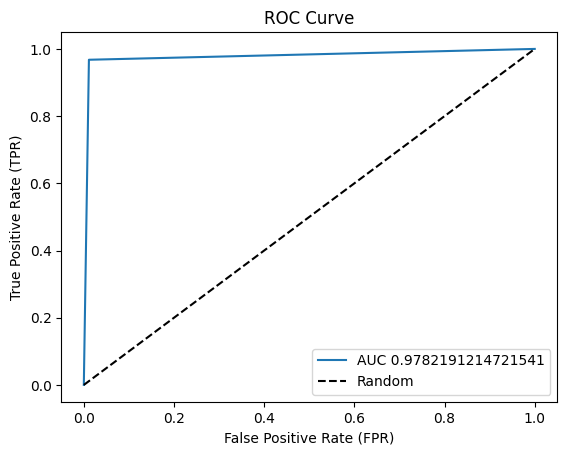

In [32]:
fpr, tpr, thresholds = roc_curve(yTest, pred)

auc = roc_auc_score(yTest, pred)
print("Area under the curve is : "+str(auc))

plt.plot(fpr, tpr, label="AUC "+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

From above we can see auc is 0.978 which means the model is nearly perfect.